In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
np.set_printoptions(precision=3, suppress=True)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [10]:
dataset = raw_dataset.copy()

In [11]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [12]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [13]:
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)
print(dataset.isna().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [14]:
print(dataset['Origin'])

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 398, dtype: int64


In [15]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
393,27.0,4,140.0,86.0,2790.0,15.6,82,True,False,False
394,44.0,4,97.0,52.0,2130.0,24.6,82,False,True,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,True,False,False
396,28.0,4,120.0,79.0,2625.0,18.6,82,True,False,False
397,31.0,4,119.0,82.0,2720.0,19.4,82,True,False,False


In [17]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


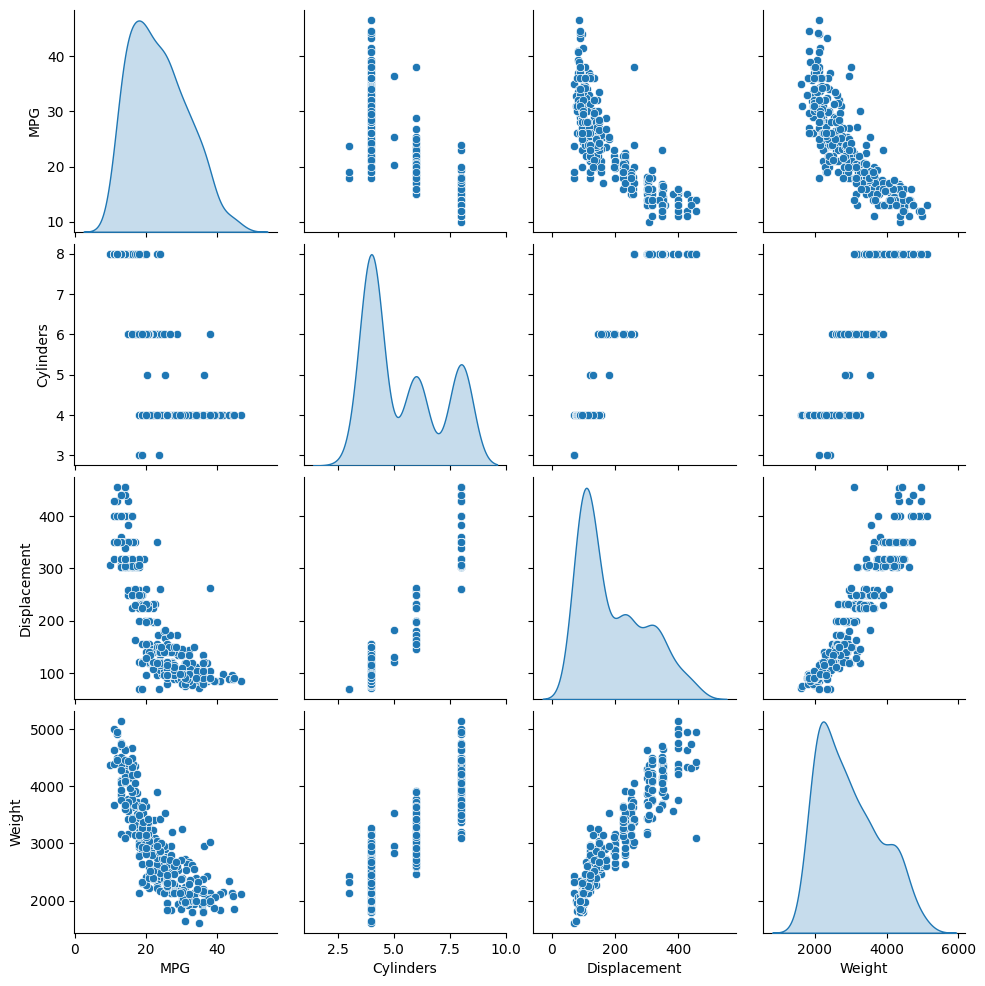

In [18]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [19]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,318.0,23.590566,7.913617,10.0,17.125,22.75,29.00,46.6
Cylinders,318.0,5.427673,1.682941,3.0,4.000,4.00,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.250,151.00,259.50,455.0
Horsepower,318.0,104.073418,38.368477,46.0,75.250,92.00,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.250,2792.50,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.900,15.50,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.000,76.00,79.00,82.0


In [20]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')


In [21]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.590566,7.913617
Cylinders,5.427673,1.682941
Displacement,193.061321,103.812742
Horsepower,104.073418,38.368477
Weight,2963.823899,844.749805
Acceleration,15.595912,2.796282
Model Year,75.946541,3.705266


In [22]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [23]:
normalizer.adapt(np.array(train_features))

In [24]:
print(normalizer.mean.numpy())

[[   5.428  193.061  104.073 2963.824   15.596   75.947    0.642    0.164
     0.195]]


In [25]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[8 351.0 153.0 4129.0 13.0 72 True False False]]



ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).